In [2]:
# STEINMETZ PREPROCESSING

In [3]:
# Set up

# Import packages
import os, requests
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd


# Download and load data 
from data.get_data import load,download

download()


In [4]:
# Load data

alldat = load()


Loading data. Patience, padawan ...


In [43]:
#Basic shieeet DataFrame: descriptive for each session
session = []
mouse_name = []
number_trials = []
total_trials = 0
for i in range(len(alldat)):
    dat = alldat[i]
    session.append(i+1)
    mouse_name.append(dat.get('mouse_name'))
    number_trials.append(len(dat.get('gocue')))
    total_trials += len(dat.get('gocue'))
    
dict = {'Session': session, 'Mouse Name': mouse_name, 'Number of Trials': number_trials}
df = pd.DataFrame(dict, columns=['Session', 'Mouse Name','Number of Trials'])
print(df)
print('Total number of trials: ', total_trials)

    Session Mouse Name  Number of Trials
0         1       Cori               214
1         2       Cori               251
2         3       Cori               228
3         4  Forssmann               249
4         5  Forssmann               254
5         6  Forssmann               290
6         7  Forssmann               252
7         8      Hench               250
8         9      Hench               372
9        10      Hench               447
10       11      Hench               342
11       12  Lederberg               340
12       13  Lederberg               300
13       14  Lederberg               268
14       15  Lederberg               404
15       16  Lederberg               280
16       17  Lederberg               224
17       18  Lederberg               316
18       19      Moniz               247
19       20      Moniz               235
20       21      Moniz               124
21       22     Muller               444
22       23     Muller               151
23       24     

In [51]:
yo = alldat[17]
type(yo.get('spks'))
yo.get('spks').shape
#just used this to confirm that the length of gocue corresponds to the number of trials, even for neural data

(1089, 316, 250)

In [170]:
sup = alldat[1]
sup.keys()

dict_keys(['spks', 'wheel', 'pupil', 'lfp', 'response', 'response_time', 'bin_size', 'stim_onset', 'contrast_right', 'contrast_left', 'brain_area', 'brain_area_lfp', 'feedback_time', 'feedback_type', 'gocue', 'mouse_name', 'date_exp', 'trough_to_peak', 'waveform_w', 'waveform_u', 'active_trials', 'contrast_left_passive', 'contrast_right_passive', 'spks_passive', 'lfp_passive', 'pupil_passive', 'wheel_passive'])

In [179]:
#DataFrame for EVERY-SINGLE-TRIAL *clap emoji* (excluding passive trials: just Go (left/right) or NoGo trials)
s = 0
session = []
mouse_name = []
trial_number = []
gocue = [] #dat['gocue']: when the go cue sound was played. 
response_time = []
latency = []
feedback_type = []
contrast_left = []
contrast_right = []
go_trial = []   #either TRUE (Go trial) or FALSE(= NoGo trial)
wheel = []

for dat in alldat:
    s += 1
    for t in range(len(dat.get('gocue'))):      #just because the length of this field = number of trials for a given session
        session.append(s)        #session number
        mouse_name.append(dat.get('mouse_name')) #you know... just the name of the little fellow
        trial_number.append(t+1)      #trial number for that particular session
        gocue.append(dat.get('gocue')[t][0]) #the sencond index value is just there so that we can directly access floats from the DF
        response_time.append(dat.get('response_time')[t][0])
        latency.append(float((dat.get('response_time')[t][0])-(dat.get('gocue')[t][0])))
        feedback_type.append(dat.get('feedback_type')[t]) #feedback type: positive (+1) means reward, negative (-1) means white noise burst 
        contrast_left.append(dat.get('contrast_left')[t])
        contrast_right.append(dat.get('contrast_right')[t]) 
        go_trial.append((dat.get('contrast_left')[t] != 0) or (dat.get('contrast_right')[t] != 0))
        
    


In [180]:
dict = {'session':session, 
        'mouse_name': mouse_name, 
        'trial_number': trial_number,
        'gocue': gocue,
        'response_time': response_time,
        'latency': latency,
        'feedback_type': feedback_type,
        'contrast_left': contrast_left,
        'contrast_right': contrast_right,
        'go_trial': go_trial
       }
df = pd.DataFrame(dict, columns=['session',
                                 'mouse_name',
                                 'trial_number', 
                                 'gocue',
                                 'response_time',
                                 'latency',
                                 'feedback_type',
                                 'contrast_left',
                                 'contrast_right',
                                 'go_trial'
                                 ]) 

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
   print(df)
#print('Total number of trials: ', len(df['trial_number'])) #just me checking everything is there

       session mouse_name  trial_number     gocue  response_time   latency  \
0      1        Cori       1             1.027216  1.150204       0.122987   
1      1        Cori       2             0.874414  1.399503       0.525089   
2      1        Cori       3             0.825213  0.949291       0.124078   
3      1        Cori       4             0.761612  2.266802       1.505190   
4      1        Cori       5             0.662010  0.816776       0.154765   
5      1        Cori       6             1.186819  1.517107       0.330288   
6      1        Cori       7             0.588009  1.133210       0.545201   
7      1        Cori       8             0.606410  1.349831       0.743422   
8      1        Cori       9             0.591209  2.097125       1.505916   
9      1        Cori       10            1.071217  1.249668       0.178451   
10     1        Cori       11            0.646010  0.850126       0.204115   
11     1        Cori       12            1.181619  2.687118     

In [210]:
#isgo = df['go_trial'] == True
#df_go = df[isgo]

reward = df['feedback_type'] == 1
nope = df['feedback_type'] == -1

df2 = df[reward]
df3 = df[nope]

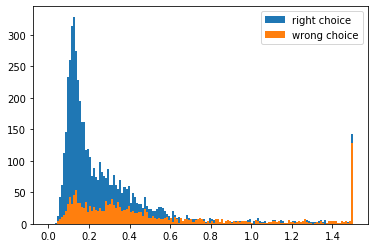

In [211]:
plt.hist(df2['latency'], bins=150, label='right choice', range=[0, 1.5])
plt.hist(df3['latency'], bins=150, label='wrong choice', range=[0, 1.5])
plt.legend()
plt.show()
